# Advanced Lane Detection
### This jupyter notebook has been created to run and visualize the lane detection data pipeline implemented in this repository.

## Data Pipeline
### The diagram below depicts a high-level view of the lane detection data pipeline
- Calibrate camera
- Process video stream
- Distortion correction
- Generate binary_image
- Perspective warp binary image
- Detect lines fit and curvature
- Draw lines on original image
- Output mp4 video with lanes highlighted

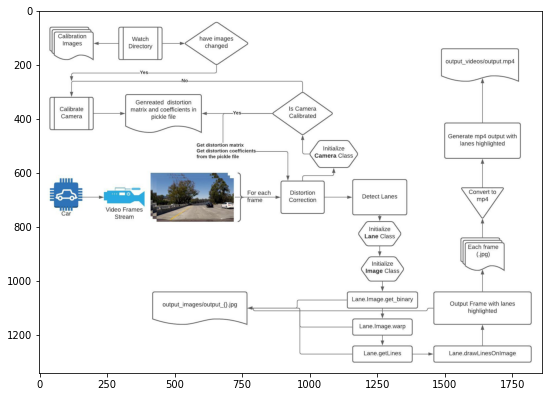

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

image = mpimg.imread("data_pipeline.jpeg")

plt.figure(figsize=(9, 280))
plt.imshow(image)

### Configure os.path to import local modules

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Calibrate Camera
### Using the calibration images (./camera_cal/*) determine the distortion matrix and coefficients. Store the calbiration config in calibration_config.p

In [7]:
from models import Camera
import glob

images = glob.glob('camera_cal/calibration*.jpg')
camera = Camera.from_calibration_config("cam-1", "front", images, (9,6))
camera.calibrate(True)


## Test Camera Calibration

Filename:
cam-1_dist_mtx_coe.p


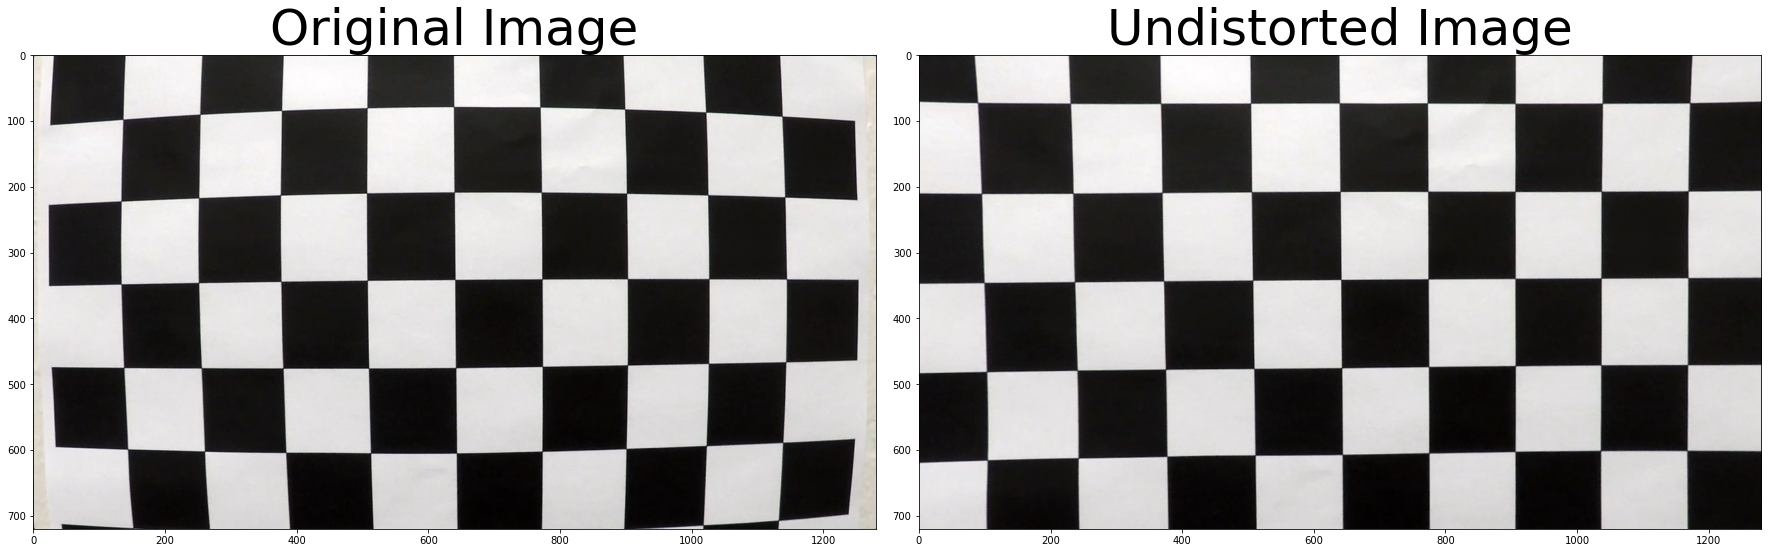

In [3]:
import matplotlib.image as mpimg
from models import Image

distorted_image = mpimg.imread('camera_cal/calibration1.jpg')
image = Image.from_camera_config("cam-1", distorted_image)
undistorted_image = image.undistort()

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(distorted_image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted_image)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0, right=1, top=0.9, bottom=0.)